### IMPORT LIBRARIES

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os 

### LOAD IMAGES

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
img = image.load_img('/content/drive/MyDrive/ComputerVision/training/happy/1.PNG')

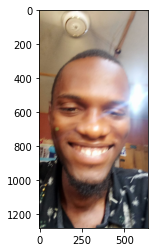

In [4]:
plt.imshow(img);

### SHAPE OF IMAGE

In [5]:
cv2.imread('/content/drive/MyDrive/ComputerVision/training/happy/1.PNG').shape

(1280, 640, 3)

### WE TRAIN THE IMAGE USING IMAGE-DATA GENERATOR

In [6]:
train = ImageDataGenerator(rescale= 1/255)

# Initiate one for your validation
validation = ImageDataGenerator(rescale= 1/255)

In [7]:
# Since we can't give multiple size matrices to your neural network, so we have to resize your image to a given size with this function.
train_dataset = train.flow_from_directory('/content/drive/MyDrive/ComputerVision/training/',
                                          target_size= (200,200),
                                          batch_size= 3,
                                          class_mode='binary')

validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/ComputerVision/validation/',
                                          target_size= (200,200),
                                          batch_size= 3,
                                          class_mode='binary')

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 1, 1, 1], dtype=int32)

### DEFINE THE MODEL

In [10]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ### Increase the number of channels.
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ### Increase the number of channels.
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ### Flatten
                                    tf.keras.layers.Flatten(),
                                    ### 
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    ###
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])

### COMPILE THE MODEL

In [11]:
model.compile(loss= 'binary_crossentropy', 
              optimizer = RMSprop(lr=0.001),
              metrics =['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [20]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs=30,
                      validation_data= validation_dataset)

Epoch 1/30
3/3 [==============================] - 1s 388ms/step - loss: 1.2651 - accuracy: 0.5000 - val_loss: 0.1831 - val_accuracy: 1.0000


In [13]:
validation_dataset.class_indices

{'happy': 0, 'sad': 1}

### WE CREATE A FUNCTION TO TEST OUT THE IMAGES.

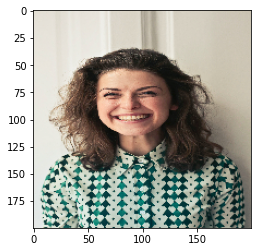

You are happy.


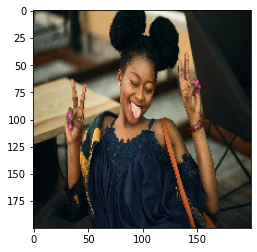

You are happy.


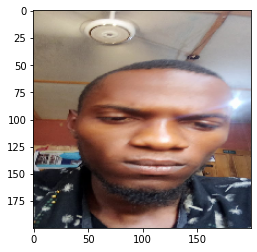

You are sad


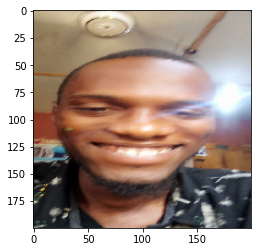

You are happy.


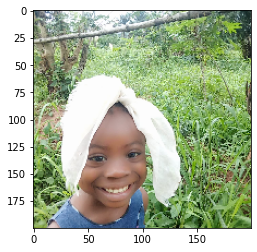

You are happy.


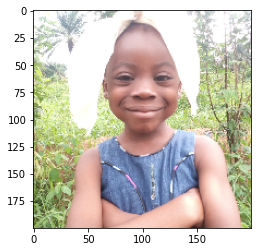

You are happy.


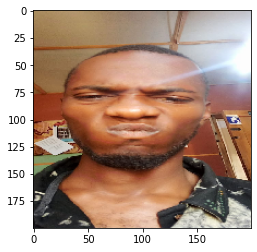

You are sad


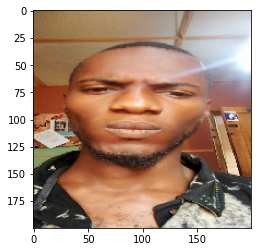

You are sad


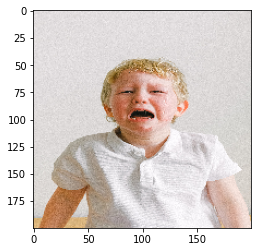

You are happy.


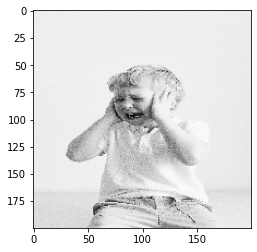

You are happy.


In [22]:
dir_path = '/content/drive/MyDrive/ComputerVision/testing'

for i in os.listdir(dir_path):
  #print(i) - To check if the images are there.
  img = image.load_img(dir_path+'//'+ i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

  # We convert the images to an array.
  X = image.img_to_array(img)
  X = np.expand_dims(X,axis =0)
  images = np.vstack([X])
  value = model.predict(images)
  if value == 0:
    print('You are happy.')
  else:
    print('You are sad')


### CONCLUSION: We are able to test out the images with Tensorflow although some representation are not correct.